<a href="https://colab.research.google.com/github/conel77/pytorchwikidocs_training/blob/main/pytorchwikidocs_4%EC%9E%A5_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

torch.manual_seed(1)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

#선형 회귀 모델 구현 입력의 차원, 출력의 차원을 인수로 받음
model = nn.Linear(1, 1)

#옵티마이저 설정, 경사하강법 SGD 를 사용함
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000

for epoch in range(nb_epochs + 1):

  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:6f}'.format(epoch, nb_epochs, cost.item()))


print(list(model.parameters()))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


다중 선형 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3, 1)


In [ ]:
print(list(model.parameters()))
#3개의 w값, 다음은 b값에 해당됨

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 2000

for epoch in range(nb_epochs + 1):
  
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()#gradient를 0 으로 초기화
  cost.backward() #비용 함수를 미분하여 gradient를 계산
  optimizer.step() #업뎃

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [ ]:
new_var = torch.FloatTensor([73,80,75])

pred_y = model(new_var)
print("훈련 후 입력이 73,80,75 일때의 예측값:", pred_y)

훈련 후 입력이 73,80,75 일때의 예측값: tensor([151.2305], grad_fn=<AddBackward0>)


In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


**클래스로 파이토치 모델 구현하기**

단순 선형 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):

#모델의 구조와 동작 정의
  def __init__(self):
    super().__init__()
    
    self.linear = nn.Linear(1,1)
#순전파 정의
  def forward(self, x):
    return self.linear(x)


model = LinearRegressionModel()

#경사하강법 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000

for epoch in range(nb_epochs+1):

  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

print(list(model.parameters()))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000
[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


다중 선형 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

class MultivariateLinearRegressionModel(nn.Module):
#다중 선형 회귀 클래스
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
#다중 선형 회귀이므로 입력이 3차원 출력이 1차원
  def forward(self, x):
    return self.linear(x)

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000

for epoch in range(nb_epochs+1):

  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch: {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))


print(list(model.parameters()))

Epoch:    0/2000 Cost: 31667.597656
Epoch:  100/2000 Cost: 0.225993
Epoch:  200/2000 Cost: 0.223911
Epoch:  300/2000 Cost: 0.221941
Epoch:  400/2000 Cost: 0.220059
Epoch:  500/2000 Cost: 0.218271
Epoch:  600/2000 Cost: 0.216575
Epoch:  700/2000 Cost: 0.214950
Epoch:  800/2000 Cost: 0.213413
Epoch:  900/2000 Cost: 0.211952
Epoch: 1000/2000 Cost: 0.210560
Epoch: 1100/2000 Cost: 0.209232
Epoch: 1200/2000 Cost: 0.207967
Epoch: 1300/2000 Cost: 0.206761
Epoch: 1400/2000 Cost: 0.205619
Epoch: 1500/2000 Cost: 0.204522
Epoch: 1600/2000 Cost: 0.203484
Epoch: 1700/2000 Cost: 0.202485
Epoch: 1800/2000 Cost: 0.201542
Epoch: 1900/2000 Cost: 0.200635
Epoch: 2000/2000 Cost: 0.199769
[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


### **미니 배치와 데이터 로드**

* 이터레이션 : 한번의 epoch 내에서 이루어지는 매개변수인 가중치W와 b의 업데이트 횟수

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])


dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

#옵티마이저 설계
model = nn.Linear(3, 1)

optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20

for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    
    x_train, y_train = samples
    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'
  .format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))


Epoch    0/20 Batch 3/3 Cost: 46583.359375
Epoch    1/20 Batch 3/3 Cost: 11605.812500
Epoch    2/20 Batch 3/3 Cost: 2276.019043
Epoch    3/20 Batch 3/3 Cost: 914.875122
Epoch    4/20 Batch 3/3 Cost: 227.932770
Epoch    5/20 Batch 3/3 Cost: 0.245806
Epoch    6/20 Batch 3/3 Cost: 65.297775
Epoch    7/20 Batch 3/3 Cost: 0.458001
Epoch    8/20 Batch 3/3 Cost: 0.120992
Epoch    9/20 Batch 3/3 Cost: 26.616819
Epoch   10/20 Batch 3/3 Cost: 21.279266
Epoch   11/20 Batch 3/3 Cost: 9.070910
Epoch   12/20 Batch 3/3 Cost: 42.977131
Epoch   13/20 Batch 3/3 Cost: 4.234856
Epoch   14/20 Batch 3/3 Cost: 1.118586
Epoch   15/20 Batch 3/3 Cost: 7.654929
Epoch   16/20 Batch 3/3 Cost: 0.561585
Epoch   17/20 Batch 3/3 Cost: 4.585477
Epoch   18/20 Batch 3/3 Cost: 41.198551
Epoch   19/20 Batch 3/3 Cost: 21.270258
Epoch   20/20 Batch 3/3 Cost: 2.077300


### **커스텀 데이터셋**

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)

#데이터셋을 dataset[i] 할 때 i번째 샘플을 가져오도록 하는 인덱싱을 위함
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 20

for epoch in range(nb_epochs + 1):

  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40548.742188
Epoch    0/20 Batch 2/3 Cost: 7291.494629
Epoch    0/20 Batch 3/3 Cost: 1811.472290
Epoch    1/20 Batch 1/3 Cost: 1189.893066
Epoch    1/20 Batch 2/3 Cost: 401.466431
Epoch    1/20 Batch 3/3 Cost: 98.862206
Epoch    2/20 Batch 1/3 Cost: 59.924492
Epoch    2/20 Batch 2/3 Cost: 5.559007
Epoch    2/20 Batch 3/3 Cost: 0.005015
Epoch    3/20 Batch 1/3 Cost: 7.238708
Epoch    3/20 Batch 2/3 Cost: 0.579787
Epoch    3/20 Batch 3/3 Cost: 9.432348
Epoch    4/20 Batch 1/3 Cost: 2.596285
Epoch    4/20 Batch 2/3 Cost: 6.112614
Epoch    4/20 Batch 3/3 Cost: 0.173577
Epoch    5/20 Batch 1/3 Cost: 0.585848
Epoch    5/20 Batch 2/3 Cost: 3.764531
Epoch    5/20 Batch 3/3 Cost: 4.496256
Epoch    6/20 Batch 1/3 Cost: 1.750809
Epoch    6/20 Batch 2/3 Cost: 2.692096
Epoch    6/20 Batch 3/3 Cost: 4.092447
Epoch    7/20 Batch 1/3 Cost: 0.873122
Epoch    7/20 Batch 2/3 Cost: 3.545633
Epoch    7/20 Batch 3/3 Cost: 4.466667
Epoch    8/20 Batch 1/3 Cost: 2.943422
Epoch   

### **로지스틱 회귀**

* 둘 중 하나를 결정하는 문제 - **이진분류**
* 이진 분류를 풀기위한 대표적인 알고리즘 - **로지스틱 회귀**

파이토치로 로지스틱 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

#훈련 값 텐서로 선언하기
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)



In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#옵티마이저 설정
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = -(y_train*torch.log(hypothesis)+(1-y_train)*torch.log(1-hypothesis)).mean()


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


  if epoch %100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))


print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])

print(prediction)

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852
tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


nn.Module로 구현하는 로지스틱 회귀

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
    
    nn.Linear(2, 1),
    nn.Sigmoid() #출력은 시그모이드 함수를 거친다.

)

optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000

for epoch in range (nb_epochs + 1):

  hypothesis = model(x_train)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    
    correct_prediction = prediction.float() == y_train

    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

    

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


클래스로 파이토치 모델 구현하기

로지스틱 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


class BinaryClassifier(nn.Module):

  def __init__(self): #클래스 조건 설정
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))


model = BinaryClassifier()

optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
    

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

## 소프트맥스 회귀 - 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩은 선택해야하는 선택지의 개수만큼 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는1, 나머지 원소는 0의 값을 가지도록 표현하는 방법
**특징**
* 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배한다.
* 원핫 인코딩을 통해 얻은 원핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다.
* 원핫 벡터는 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있다.

### **소프트맥스 회귀 이해하기**

* 로지스틱 회귀 : 로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만든다.
* 소프트맥스 회귀 : 확률의 총 합이 1이 되는 것을 다중 클래스 분류 문제에 적용한다.

파이토치로 소프트맥스의 비용 함수 구현하기(로우-레벨)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

z = torch.rand(3, 5, requires_grad = True)

hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

#각 샘플에 대해서 임의의 레이블을 만든다.
y = torch.randint(5, (3,)).long()
print(y)
#각 레이블에 대해서 원-핫 인코딩을 수행한다.
y_one_hot = torch.zeros_like(hypothesis)
print(y_one_hot)


y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)


tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2, 1])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]])
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

W = torch.zeros((4, 3), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W, b], lr = 0.1)


nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  hypothesis = F.softmax(x_train.matmul(W)+b, dim = 1)

  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))




Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


소프트맥스 회귀 nn.Module로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = torch.FloatTensor([[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]])
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs):

  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178


소프트맥스 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

class SoftmaxClassifierModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)

  def forward(self, x):
    return self.linear(x)

x_train = torch.FloatTensor([[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]])
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs):

  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178


### 소프트맥스 회귀로 MNIST 데이터 분류하기

다음 기기로 학습합니다: cuda


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished
Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


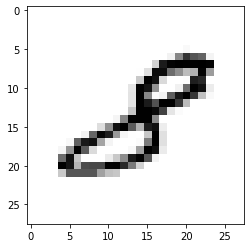

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

#분류기 구현을 위한 사전 설정

USE_CUDA = torch.cuda.is_available()

device = torch.device("cuda" if USE_CUDA else "cpu")

print("다음 기기로 학습합니다:", device)

random.seed(777)
torch.manual_seed(777)
#랜덤 시드를 고정

if device == 'cuda':
  torch.cuda.manual_seed_all(777)

training_epochs = 15
batch_size = 100

#MNIST 분류기 구현하기
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

#데이터 로더를 사용함
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

linear = nn.Linear(784, 10, bias=True).to(device)

#크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함한다.
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

#MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다.
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()